In [1]:
# Import useful libraries

import pandas as pd 
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt

In [8]:
# Import recorded data as a panadas DataFrame
dataset = pd.read_csv(('analog-data.csv'), names = ['time', 'recorded_data'])

# Seperate recorded data into new columns
dataset[['Analog','Voltage [V]','Temperature [C]']] = dataset['recorded_data'].str.split(' ', expand=True)

# Clean up the new columns 
dataset['Analog'] = dataset['Analog'].str.strip("[',]").astype('float')
dataset['Voltage [V]'] = dataset['Voltage [V]'].str.strip("[',]").astype('float')
dataset['Temperature [C]'] = dataset['Temperature [C]'].str.strip("[',]").astype('float')

# Convert time to datetime for delta Time Calculations
dataset['time'] = pd.to_datetime(dataset['time'])

# Create a column for Year, Month, Day, Clock 
dataset['Year'] = dataset['time'].dt.year
dataset['Month'] = dataset['time'].dt.month_name()
dataset['Weekday'] = dataset['time'].dt.day_name()
dataset['Hour'] = dataset['time'].dt.hour
dataset['Minute'] = dataset['time'].dt.minute
dataset['Second'] = dataset['time'].dt.second

In [9]:
dataset.head()

,time,recorded_data,Analog,Voltage [V],Temperature [C],Year,Month,Weekday,Hour,Minute,Second
0,2024-01-12 17:40:16.802290,"['4.00', '0.65', '15.43']",4.0,0.65,15.43,2024,January,Friday,17,40,16
1,2024-01-12 17:40:17.804157,"['134.00', '0.65', '15.43']",134.0,0.65,15.43,2024,January,Friday,17,40,17
2,2024-01-12 17:40:18.806437,"['134.00', '0.65', '15.43']",134.0,0.65,15.43,2024,January,Friday,17,40,18
3,2024-01-12 17:40:19.808593,"['134.00', '0.65', '15.43']",134.0,0.65,15.43,2024,January,Friday,17,40,19
4,2024-01-12 17:40:20.811007,"['134.00', '0.65', '15.43']",134.0,0.65,15.43,2024,January,Friday,17,40,20


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             30 non-null     datetime64[ns]
 1   recorded_data    30 non-null     object        
 2   Analog           30 non-null     float64       
 3   Voltage [V]      30 non-null     float64       
 4   Temperature [C]  30 non-null     float64       
 5   Year             30 non-null     int64         
 6   Month            30 non-null     object        
 7   Weekday          30 non-null     object        
 8   Hour             30 non-null     int64         
 9   Minute           30 non-null     int64         
 10  Second           30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 2.7+ KB


In [11]:
# Test change in time
dataset['time'].loc[10]- dataset['time'].loc[0]

Timedelta('0 days 00:00:10.026271')

In [12]:
# Ideal Fermentation
fermentation_xvalues = dataset['time']
fermentation_bottom_yvalues = np.full((len(dataset['time']),1),21)
fermentation_top_yvalues = np.full((len(dataset['time']),1),25)


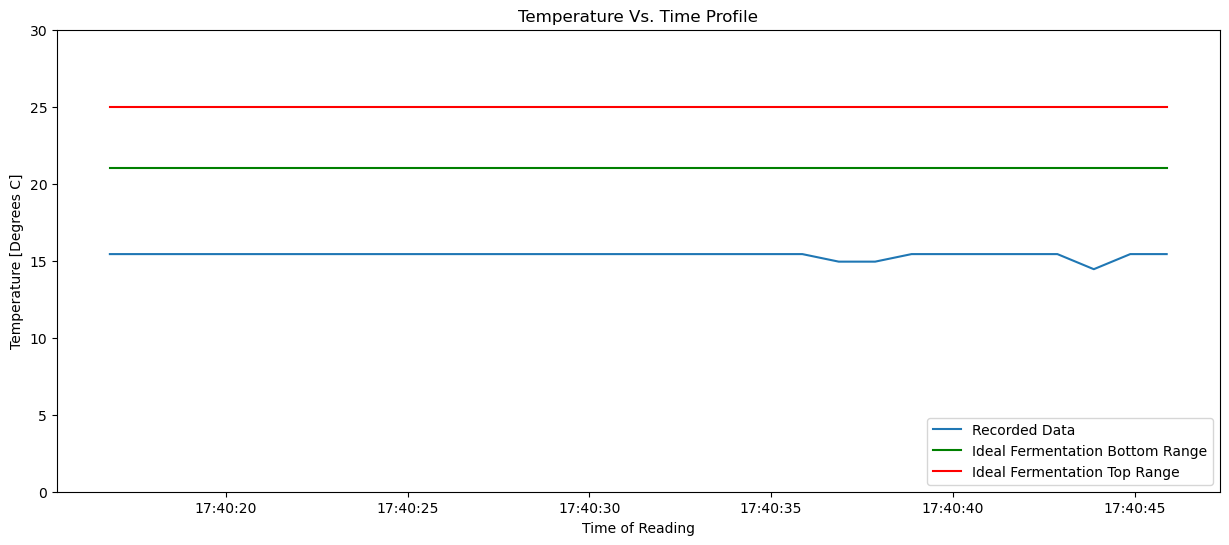

In [14]:
temp_time_chart = plt.figure(figsize=(15,6))

plt.plot(dataset['time'],dataset['Temperature [C]'],ls='-', label='Recorded Data')
plt.plot(fermentation_xvalues,fermentation_bottom_yvalues, label = 'Ideal Fermentation Bottom Range', color='green')
plt.plot(fermentation_xvalues,fermentation_top_yvalues, label = 'Ideal Fermentation Top Range',color='red')

plt.ylim(0,30)
plt.xlabel('Time of Reading')
plt.ylabel('Temperature [Degrees C]')
plt.title('Temperature Vs. Time Profile')
plt.legend(loc='lower right')
plt.show()